In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
ds = xr.open_dataset('ERA5_precip_2009.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 141, latitude: 241, time: 26304)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -85.5 -85.25 -85.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 30.5 30.25 30.0
  * time       (time) datetime64[ns] 2008-01-01 ... 2010-12-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-22 17:41:16 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [6]:
precip = ds['tp']*1000.0

In [9]:
daily_precip = precip.resample(time='1D').sum()

In [10]:
annual_means = daily_precip.groupby('time.year').mean(dim='time')

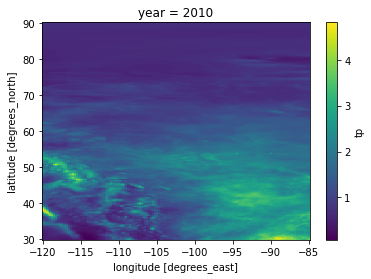

In [12]:
annual_means.isel(year=2).plot()

In [18]:
daily_precip.time.dt.year

<xarray.DataArray 'year' (time: 1096)>
array([2008, 2008, 2008, ..., 2010, 2010, 2010])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01 2008-01-02 ... 2010-12-31